# Airline Customer Value Analysis Case

## EDA, Insight, & Visualization

In [42]:
import warnings
import pandas as pd
import numpy as np
from numpy import percentile
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

%matplotlib inline
warnings.filterwarnings('ignore')


In [43]:
df=pd.read_csv('flight.csv')
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [45]:
df.isnull().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [46]:
df.duplicated().sum()

0

In [47]:
numericals=df.select_dtypes(include=['int64','float64']).columns.tolist()
categoricals=df.select_dtypes(include='object').columns.tolist()

In [48]:
df.shape

(62988, 23)

In [49]:
df[numericals].describe().T

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,62988.0,31494.500000,18183.213715,1.0,15747.750000,31494.500000,47241.250000,62988.0
FFP_TIER,62988.0,4.102162,0.373856,4.0,4.000000,4.000000,4.000000,6.0
AGE,62568.0,42.476346,9.885915,6.0,35.000000,41.000000,48.000000,110.0
FLIGHT_COUNT,62988.0,11.839414,14.049471,2.0,3.000000,7.000000,15.000000,213.0
BP_SUM,62988.0,10925.081254,16339.486151,0.0,2518.000000,5700.000000,12831.000000,505308.0
SUM_YR_1,62437.0,5355.376064,8109.450147,0.0,1003.000000,2800.000000,6574.000000,239560.0
SUM_YR_2,62850.0,5604.026014,8703.364247,0.0,780.000000,2773.000000,6845.750000,234188.0
SEG_KM_SUM,62988.0,17123.878691,20960.844623,368.0,4747.000000,9994.000000,21271.250000,580717.0
LAST_TO_END,62988.0,176.120102,183.822223,1.0,29.000000,108.000000,268.000000,731.0
AVG_INTERVAL,62988.0,67.749788,77.517866,0.0,23.370370,44.666667,82.000000,728.0


In [50]:
df[categoricals].describe().T

,count,unique,top,freq
FFP_DATE,62988,3068,1/13/2011,184
FIRST_FLIGHT_DATE,62988,3406,2/16/2013,96
GENDER,62985,2,Male,48134
WORK_CITY,60719,3234,guangzhou,9386
WORK_PROVINCE,59740,1165,guangdong,17509
WORK_COUNTRY,62962,118,CN,57748
LOAD_TIME,62988,1,3/31/2014,62988
LAST_FLIGHT_DATE,62988,731,3/31/2014,959


##Univariate Analysist

In [51]:
def numericals_plotting(plot):
  plt.figure(figsize=[30,8])
  for i in range(0,len(numericals)):
    plt.subplot(1,len(numericals),i+1)
    if plot == 'box':
      sns.boxplot(y=df[numericals[i]], color='#f5b932ff', orient='v', showfliers=True)
    elif plot == 'dist':
      sns.distplot(df[numericals[i]], color='#0198a3ff')
    elif plot == 'violin':
      sns.violinplot(y=df[numericals[i]], color='#f5b932ff', orient='v')
    else :
      None
    plt.tight_layout()

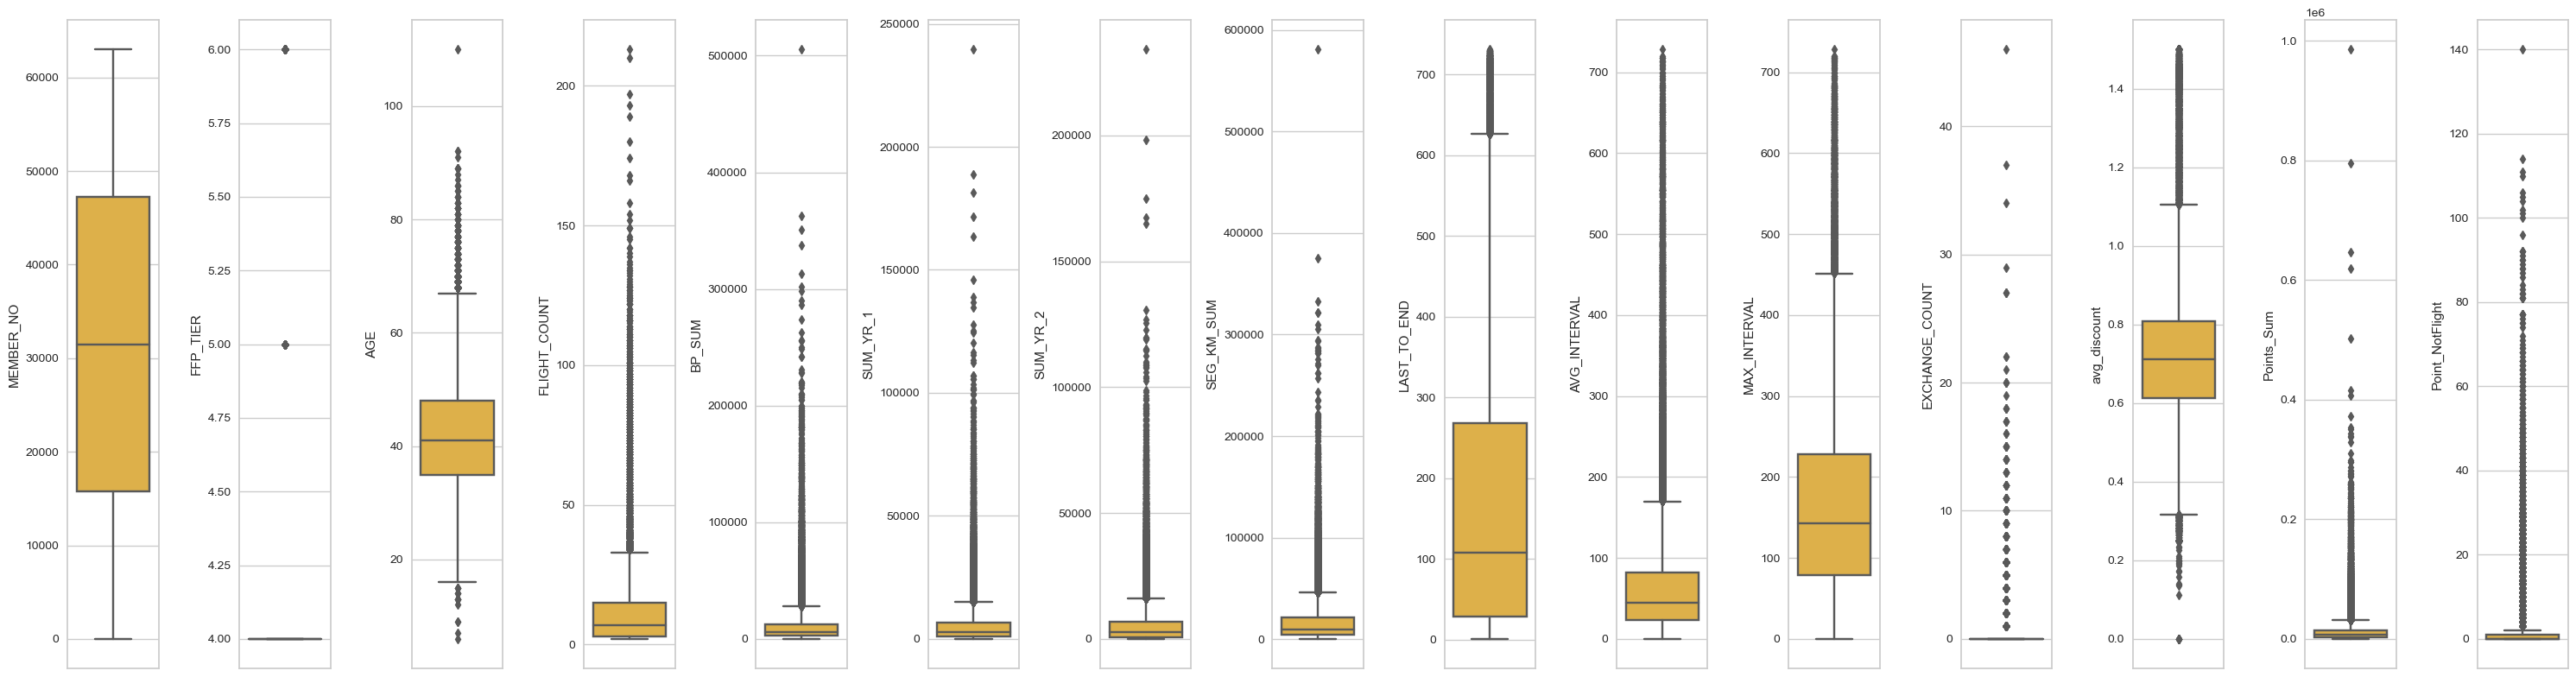

In [52]:
numericals_plotting('box')

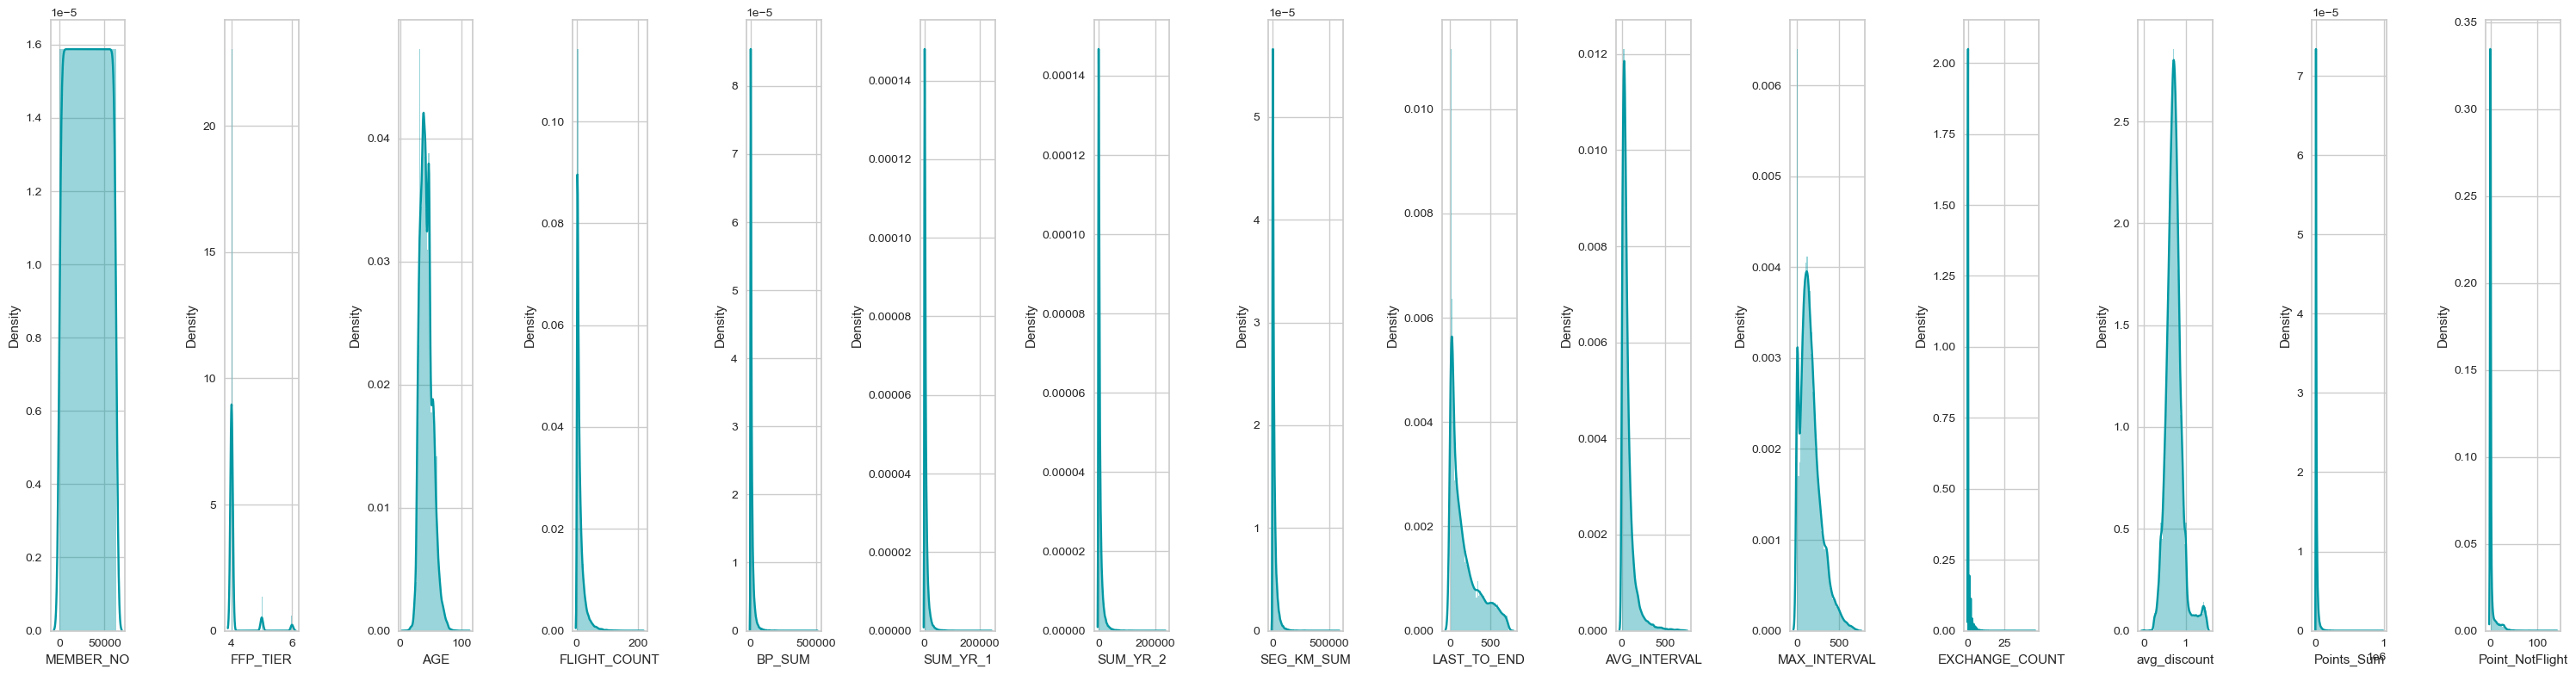

In [53]:
numericals_plotting('dist')

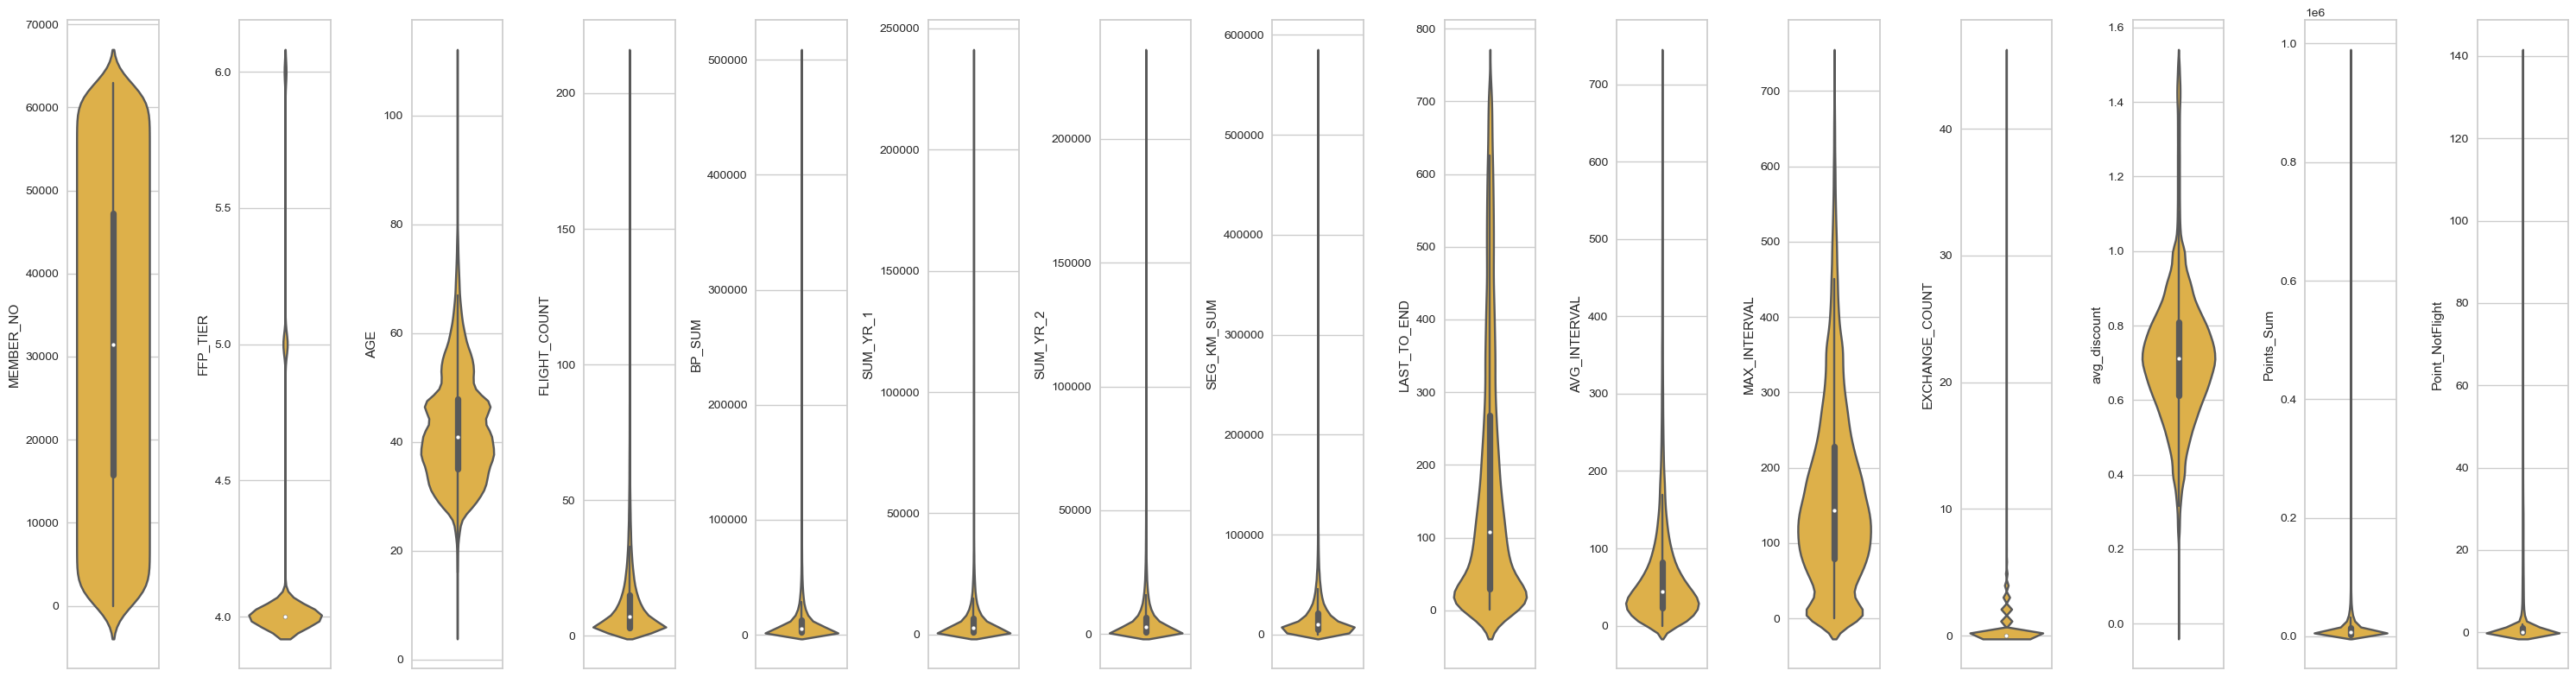

In [54]:
numericals_plotting('violin')

In [55]:
# Mencari Outliers Menggunakan IQR
for i in df.columns:
    if df[i].dtypes in [np.int64, np.float64]:
        print(i, ':', df[i].dtypes)

        Q1 = df[i].quantile(0.25)
        print('Q1 =', Q1)

        Q3 = df[i].quantile(0.75)
        print('Q3 =', Q3)

        IQR = Q3 - Q1
        print('IQR =', IQR)

        nilai_min = df[i].min()
        print('nilai min =', nilai_min)
        min_IQR = Q1 - 1.5 * IQR
        print('Lower Bound =', min_IQR)

        nilai_max = df[i].max()
        print('nilai max =', nilai_max)
        max_IQR = Q3 + 1.5 * IQR
        print('Upper Bound =', max_IQR)

        # Mencari outliers
        if nilai_min < min_IQR:
            print('Low outlier is found <', min_IQR)
            print('Low outlier Index:', list(df[df[i] < min_IQR].index))
        if nilai_max > max_IQR:
            print('High outlier is found >', max_IQR)
            print('High outlier Index:', list(df[df[i] > max_IQR].index))

        print('\n')

MEMBER_NO : int64
Q1 = 15747.75
Q3 = 47241.25
IQR = 31493.5
nilai min = 1
Lower Bound = -31492.5
nilai max = 62988
Upper Bound = 94481.5


FFP_TIER : int64
Q1 = 4.0
Q3 = 4.0
IQR = 0.0
nilai min = 4
Lower Bound = 4.0
nilai max = 6
Upper Bound = 4.0
High outlier is found > 4.0
High outlier Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 115, 116, 117, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 148, 149, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,

In [56]:
for col in categoricals:
    print(f'''Value count kolom {col}:''')
    print('-' * 50)
    print(df[col].value_counts())
    print()

Value count kolom FFP_DATE:
--------------------------------------------------
1/13/2011     184
1/1/2013      165
3/1/2013      100
11/17/2010     99
1/14/2011      95
             ... 
10/4/2005       1
5/18/2009       1
11/29/2004      1
11/7/2004       1
5/19/2009       1
Name: FFP_DATE, Length: 3068, dtype: int64

Value count kolom FIRST_FLIGHT_DATE:
--------------------------------------------------
2/16/2013    96
9/30/2012    85
2/15/2013    84
9/9/2005     78
4/21/2012    70
             ..
3/2/2005      1
4/12/2009     1
2/20/2005     1
1/27/2005     1
12/7/2004     1
Name: FIRST_FLIGHT_DATE, Length: 3406, dtype: int64

Value count kolom GENDER:
--------------------------------------------------
Male      48134
Female    14851
Name: GENDER, dtype: int64

Value count kolom WORK_CITY:
--------------------------------------------------
guangzhou    9386
beijing      7845
shanghai     5001
shenzhen     3605
dalian       1979
             ... 
KASUGAI         1
hainan          1
x

##Multivariate Analysis

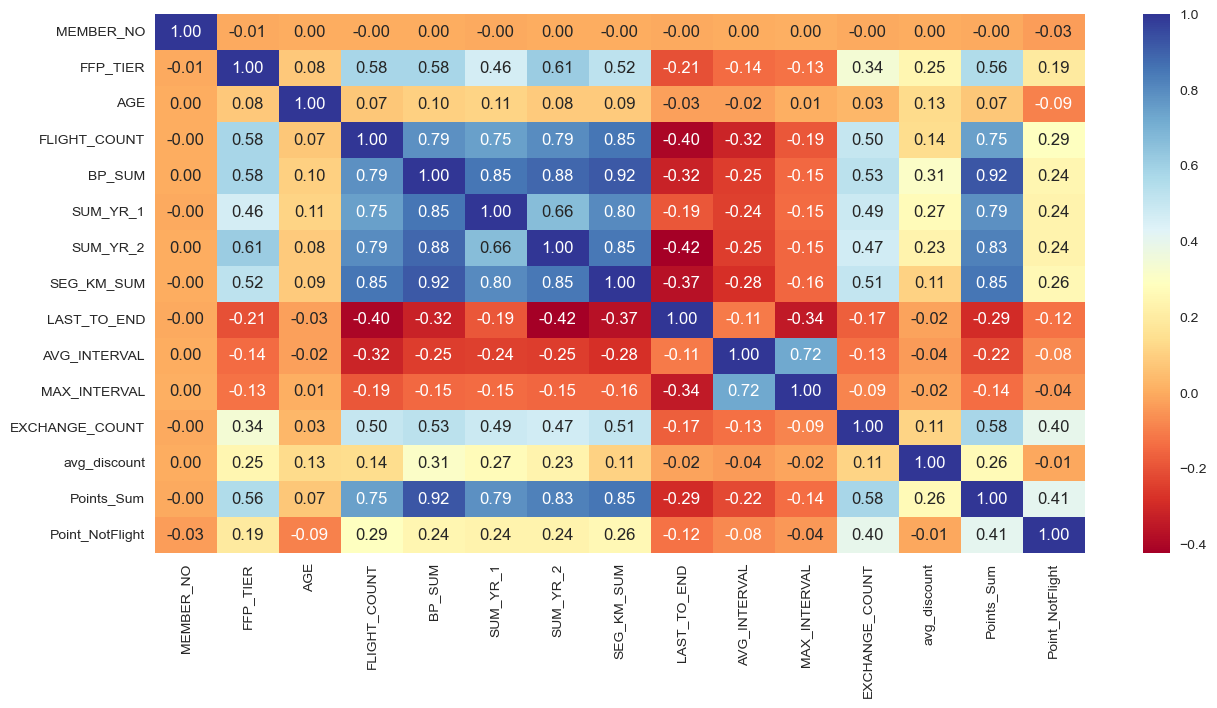

In [57]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), cmap='RdYlBu', annot=True, fmt='.2f')

plt.show()

Summary :
- Data memiliki 62988 rows & 23 columns.
- Terdapat missing value pada feature GENDER, WORK_CITY, WORK_PROVINCE, WORK_COUNTRY,AGE, SUM_YR_1 & SUM_YR_2.
- Tidak terdapat duplicated data.
- Terdapat feature yang memiliki outliers data yaitu FFP_TIER, AGE, FLIGHT_COUNT, BP_SUM, SUM_YR_1, SUM_YR_2, SEG_KM_SUM, LAST_TO_END, AVG_INTERVAL, MAX_INTERVAL, EXCHANGE_COUNT, avg_discount, Points_Sum, & Point_NotFlight.
- Pada feature kategorikal meyoritas memiliki data unik.
- Distribusi data mayoritas berbentuk positively skew, kecuali MEMBER_NO & avg_discount mendekati normal.
- Terdapat beberapa feature yang memiliki korelasi tinggi yaitu FLIGHT_COUNT, BP_SUM, SUM_YR_1, SUM_YR_2, SEG_KM_SUM, AVG_INTERVAL, MAX_INTERVAL & Points_Sum.

## Preprocessing Data

In [58]:
df2=df.copy()
df2.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [59]:
df_missing=df2[df2.isna().any(axis=1)]
percen_df_missing=round(len(df_missing)/len(df2)*100,2)
percen_df_missing

7.51

Missing value hanya 7.51%, maka diputuskan untuk dihapus karena tidak terlalu signifikan mempengaruhi hasil & beberapa feature memiliki banyak value yang unik yaitu GENDER, WORK_CITY, WORK_PROVINCE, WORK_COUNTRY, AGE, SUM_YR_1, & SUM_YR_2.

In [60]:
df2 = df2.drop(columns = ['GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'AGE', 'SUM_YR_1', 'SUM_YR_2'])

In [61]:
df2.isna().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
FFP_TIER             0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

In [62]:
df2.duplicated().sum()

0

In [63]:
df2[df2['LAST_FLIGHT_DATE'] == '2014/2/29  0:00:00'].head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,FFP_TIER,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
248,56497,6/17/2007,6/17/2007,6,3/31/2014,53,116307,85000,2014/2/29 0:00:00,32,13.250000,57,0,1.373478,132653,4
447,17306,8/26/2009,4/29/2010,5,3/31/2014,31,96739,69453,2014/2/29 0:00:00,32,22.766667,75,6,1.375395,101413,7
473,915,11/10/2006,1/26/2007,5,3/31/2014,49,84754,65717,2014/2/29 0:00:00,32,14.250000,65,1,1.425974,93153,8
832,20336,7/13/2005,8/6/2005,5,3/31/2014,80,61418,114222,2014/2/29 0:00:00,32,8.696203,34,2,0.664970,91476,15
1051,62884,5/24/2006,4/21/2007,5,3/31/2014,27,65918,49859,2014/2/29 0:00:00,32,19.115385,72,4,1.388584,69047,4


In [64]:
#Merubah tanggal 2014/2/29 pada feature, karena pada tahun 2014 bukan tahun kabisat sehingga tidak ada tanggal 29 di bulan Februari.
df2['LAST_FLIGHT_DATE'] = df2['LAST_FLIGHT_DATE'].replace('2014/2/29  0:00:00', '2014/2/28  0:00:00')
df2[df2.LAST_FLIGHT_DATE.str.contains('2014/2/28')].head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,FFP_TIER,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
248,56497,6/17/2007,6/17/2007,6,3/31/2014,53,116307,85000,2014/2/28 0:00:00,32,13.250000,57,0,1.373478,132653,4
447,17306,8/26/2009,4/29/2010,5,3/31/2014,31,96739,69453,2014/2/28 0:00:00,32,22.766667,75,6,1.375395,101413,7
473,915,11/10/2006,1/26/2007,5,3/31/2014,49,84754,65717,2014/2/28 0:00:00,32,14.250000,65,1,1.425974,93153,8
832,20336,7/13/2005,8/6/2005,5,3/31/2014,80,61418,114222,2014/2/28 0:00:00,32,8.696203,34,2,0.664970,91476,15
1051,62884,5/24/2006,4/21/2007,5,3/31/2014,27,65918,49859,2014/2/28 0:00:00,32,19.115385,72,4,1.388584,69047,4


In [65]:
#Merubah data type menjadi datetime
date_features=['FFP_DATE','FIRST_FLIGHT_DATE','LOAD_TIME','LAST_FLIGHT_DATE']
for col in date_features:
  df2[col]=pd.to_datetime(df2[col])

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          62988 non-null  int64         
 1   FFP_DATE           62988 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  62988 non-null  datetime64[ns]
 3   FFP_TIER           62988 non-null  int64         
 4   LOAD_TIME          62988 non-null  datetime64[ns]
 5   FLIGHT_COUNT       62988 non-null  int64         
 6   BP_SUM             62988 non-null  int64         
 7   SEG_KM_SUM         62988 non-null  int64         
 8   LAST_FLIGHT_DATE   62988 non-null  datetime64[ns]
 9   LAST_TO_END        62988 non-null  int64         
 10  AVG_INTERVAL       62988 non-null  float64       
 11  MAX_INTERVAL       62988 non-null  int64         
 12  EXCHANGE_COUNT     62988 non-null  int64         
 13  avg_discount       62988 non-null  float64       
 14  Points

In [66]:
#Menambah feature baru
df2['LOYALTY_TIME']=((df2['LOAD_TIME']-df2['FFP_DATE']).dt.days/30).astype('int64')

In [67]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          62988 non-null  int64         
 1   FFP_DATE           62988 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  62988 non-null  datetime64[ns]
 3   FFP_TIER           62988 non-null  int64         
 4   LOAD_TIME          62988 non-null  datetime64[ns]
 5   FLIGHT_COUNT       62988 non-null  int64         
 6   BP_SUM             62988 non-null  int64         
 7   SEG_KM_SUM         62988 non-null  int64         
 8   LAST_FLIGHT_DATE   62988 non-null  datetime64[ns]
 9   LAST_TO_END        62988 non-null  int64         
 10  AVG_INTERVAL       62988 non-null  float64       
 11  MAX_INTERVAL       62988 non-null  int64         
 12  EXCHANGE_COUNT     62988 non-null  int64         
 13  avg_discount       62988 non-null  float64       
 14  Points

In [68]:
#Mengatasi outliers data
print(f'Jumlah baris sebelum filter outlier: {len(df2)}')
nums=df2.select_dtypes(include=['int64','float64']).columns.tolist()
filter = np.array([True] * len(df2))
for col in nums:
    Q1 = df2[col].quantile(0.25)
    Q3 = df2[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filter = ((df2[col] >= low_limit) & (df2[col] <= high_limit)) & filter

df2 = df2[filter].reset_index()
print('Jumlah baris setelah filter outlier', len(df2))

Jumlah baris sebelum filter outlier: 62988
Jumlah baris setelah filter outlier 37132


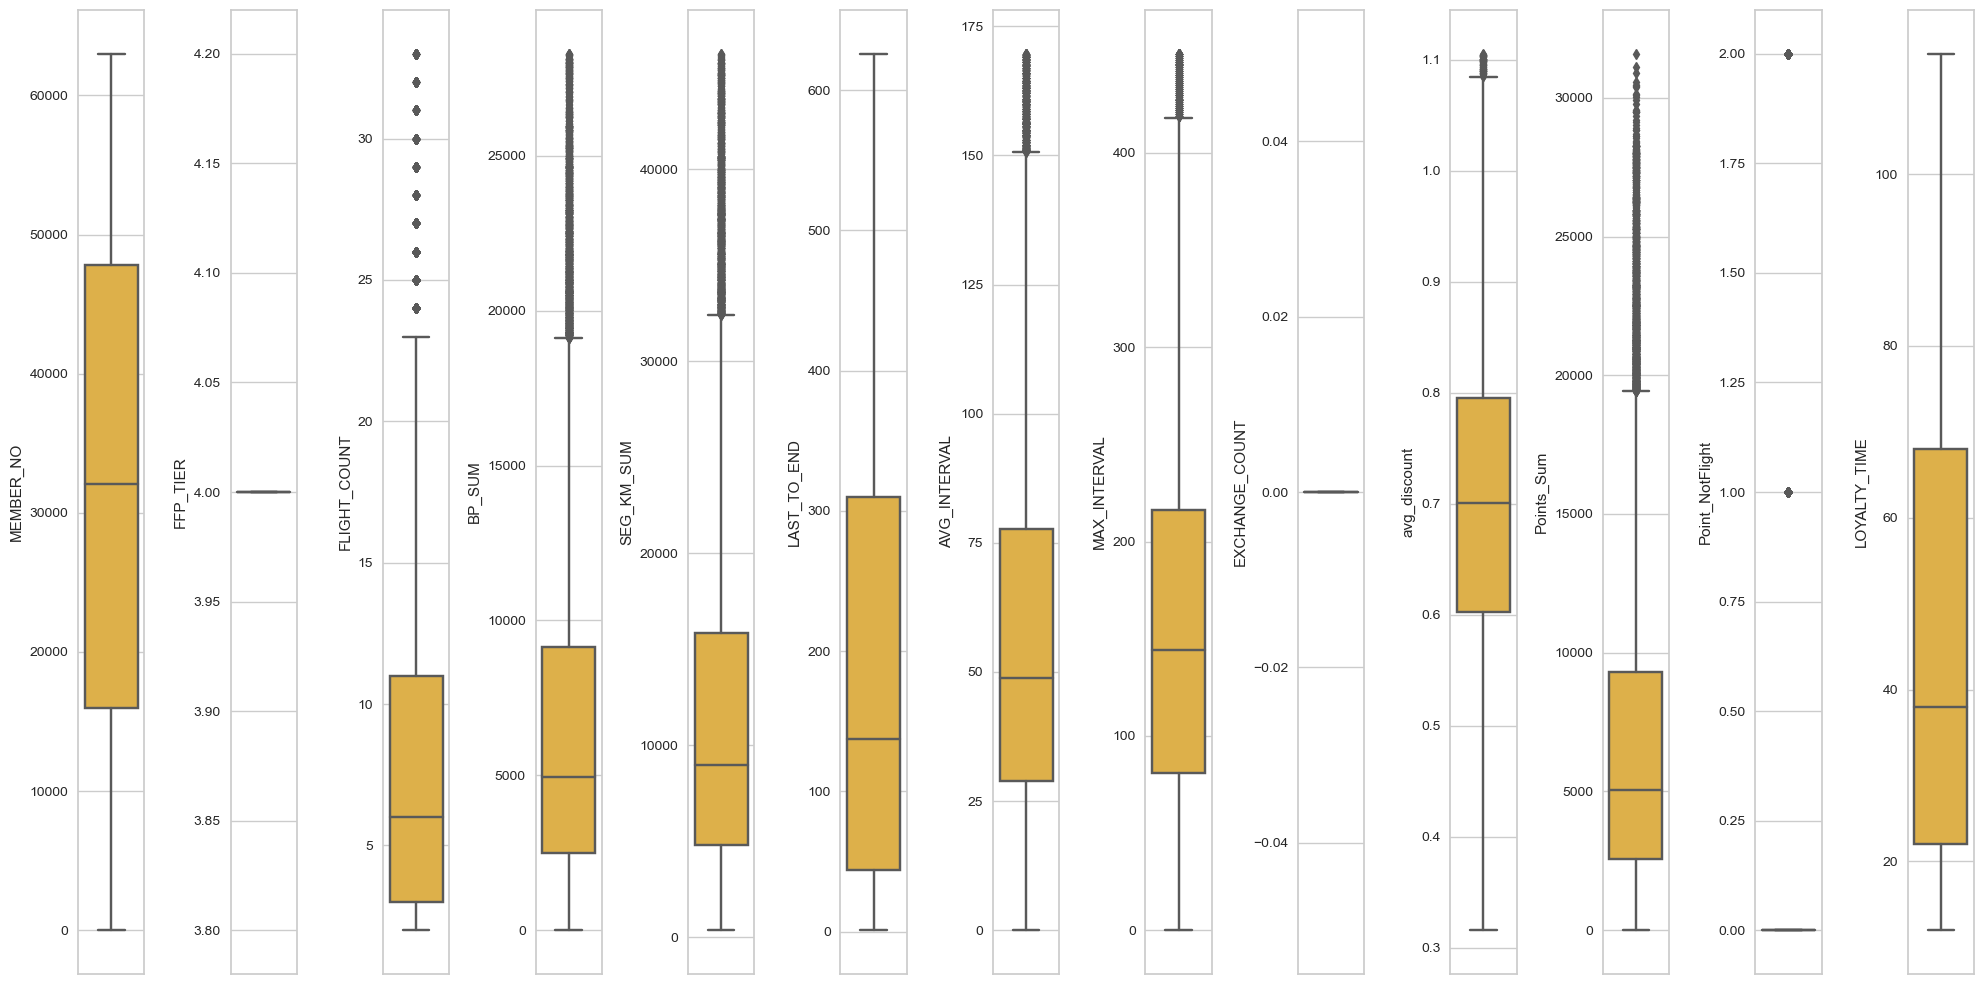

In [69]:
plt.figure(figsize=(20, 10))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df2[nums[i]], color='#f5b932ff', orient='v', showfliers=True)
    plt.tight_layout()

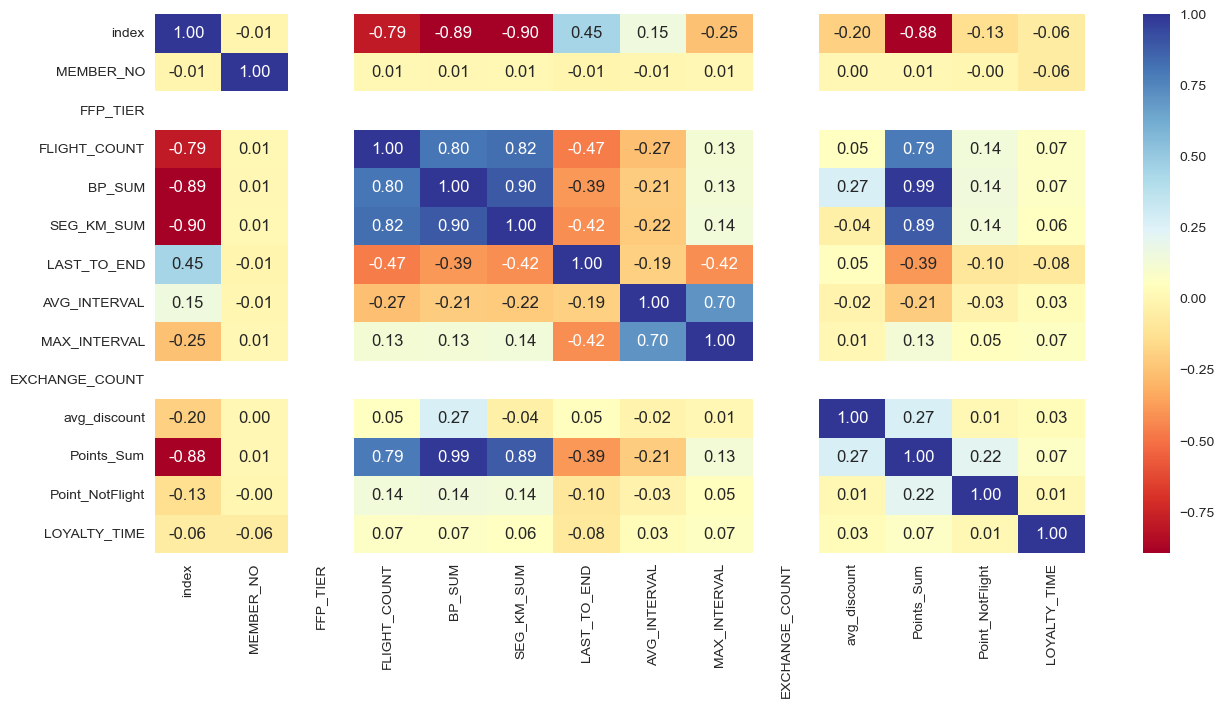

In [70]:
plt.figure(figsize=(15,7))
sns.heatmap(df2.corr(), cmap='RdYlBu', annot=True, fmt='.2f')

plt.show()

Berdasarkan heatmap diatas, maka seleksi data menggunakan LRFC model
- L (LOYALTY) : Lama waktu user menjadi membership (LOYALTY_TIME).
- R (RECENCY) : Jarak waktu sejak penerbangan terakhir ke pesanan teakhir (LAST_TO_END).
- F (FREQUENCY) : Total jumlah user melakukan penerbangan (FLIGHT_COUNT).
- C (DISCOUNT) : Rata-rata discount yang didapat user (avg_discount).

In [71]:
df2 = df2 [['LOYALTY_TIME','LAST_TO_END','FLIGHT_COUNT','avg_discount']].copy()
df2.head()

,LOYALTY_TIME,LAST_TO_END,FLIGHT_COUNT,avg_discount
0,58,4,23,0.756123
1,79,246,6,0.758333
2,26,177,25,0.871109
3,22,21,26,0.749481
4,23,38,16,0.753051


In [72]:
#Standardisasi & merubah nama columns
df2.columns = ['Loyalty','Recency','Frequency','Discount']
features = ['Loyalty','Recency','Frequency','Discount']
X = df2[features].values

X_std = StandardScaler().fit_transform(X)
df_std = pd.DataFrame(data=X_std, columns=features)
df_std.head()

,Loyalty,Recency,Frequency,Discount
0,0.446329,-1.082967,2.369396,0.404640
1,1.209392,0.298704,-0.354461,0.419950
2,-0.716433,-0.095243,2.689850,1.200920
3,-0.861778,-0.985907,2.850076,0.358649
4,-0.825442,-0.888848,1.247808,0.383371


## Modeling Data

<AxesSubplot:>

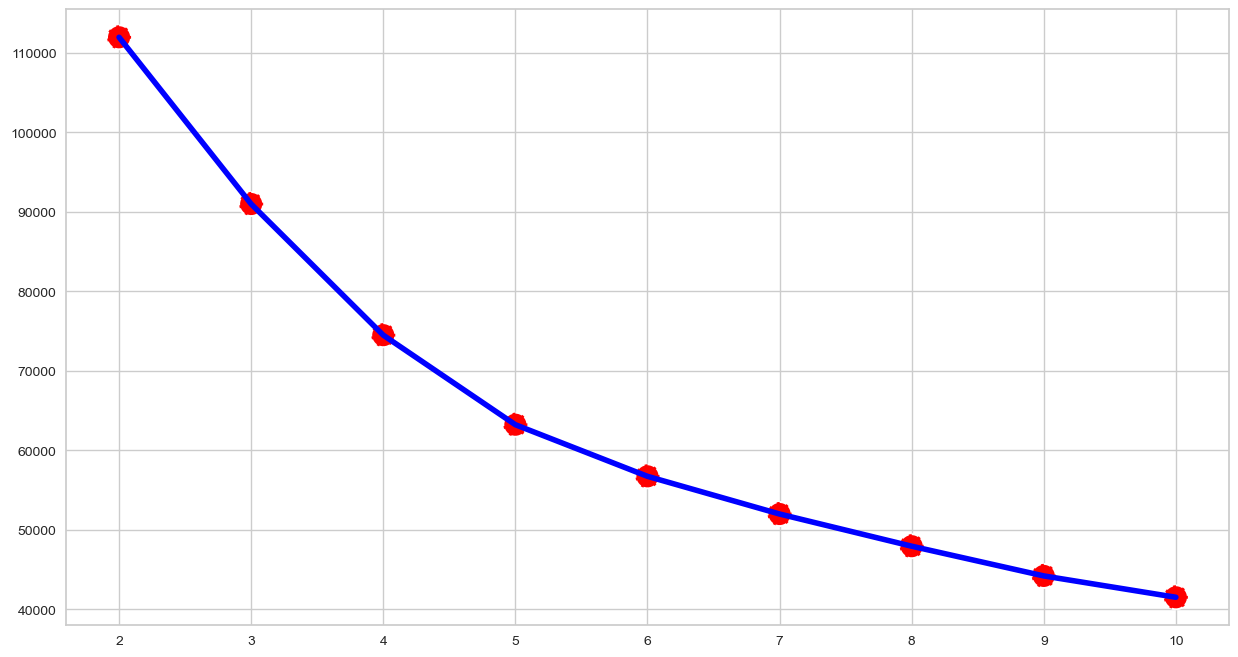

In [73]:
#K-Means

inertia = []
K = range(2,11)
for i in K :
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_std)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(15, 8))
sns.lineplot(x=K, y=inertia, color='blue', linewidth = 4)
sns.scatterplot(x=K, y=inertia, s=300, color='red', linestyle='--')

In [74]:
(pd.Series(inertia) - pd.Series(inertia).shift(-1)) / pd.Series(inertia) * 100

0    18.735978
1    18.132622
2    15.124068
3    10.270038
4     8.358873
5     7.787305
6     7.798195
7     6.079984
8          NaN
dtype: float64

Dilihat dari grafik, tidak terlalu terlihat nilai penurunan  dan patahannya yang tajam, tetapi jika dilihat dari selisih nilai inertia, nilai K-optimal diantara 2-5.

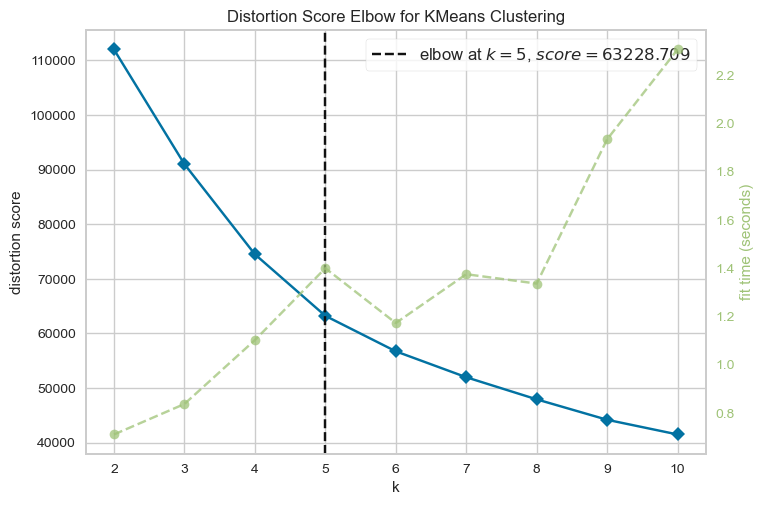

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [75]:
# visualisasi innertia vs k dengan parameter distortion
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(2,11), metric='distortion', timings=True, locate_elbow=True)
visualizer.fit(df_std)
visualizer.show()

Jika dilihat dari grafik perbandingan antara inertia vs k dengan parameter distorsi, maka nilai optimal adalah 5.

In [76]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_std.values)
df_std['cluster'] = kmeans.labels_
df_std.sample(5)

,Loyalty,Recency,Frequency,Discount,cluster
22985,-1.225141,0.726908,-0.194234,1.296533,3
19503,-0.534751,2.068613,-0.835141,0.345504,3
14992,-0.171388,1.440581,-0.354461,-0.468906,3
28082,-0.861778,1.845947,-0.674914,-1.965417,2
8281,-1.116132,-0.591960,1.408035,-0.819474,4


In [77]:
#Menggunakan PCA untuk visualisasi

from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(df_std)
pcs = pca.transform(df_std)

df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca['cluster'] = df_std['cluster']
df_pca.sample(5)

,PC 1,PC 2,cluster
9865,-0.587783,1.493365,1
25651,-1.806118,-0.511607,0
33120,-0.989511,0.465981,1
18415,0.277761,-0.730236,2
24390,1.205067,-1.489806,3


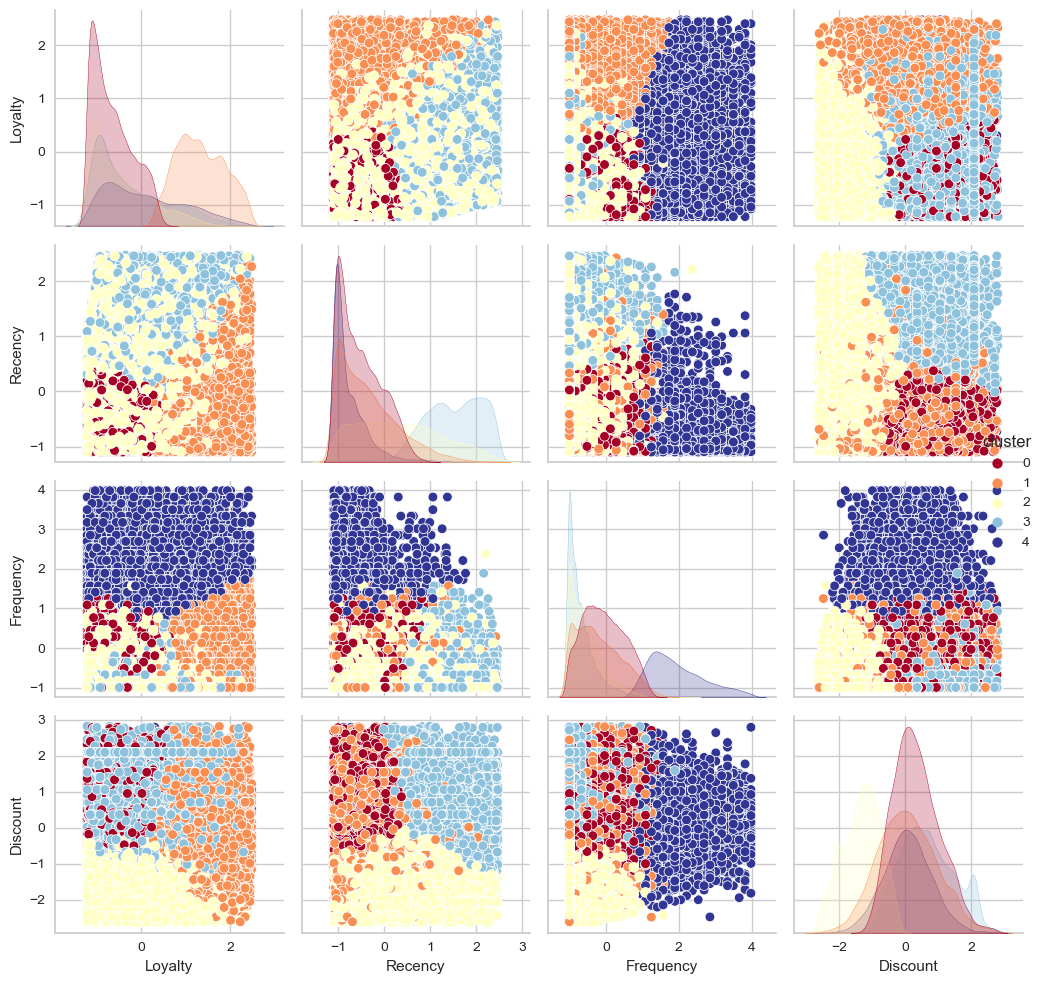

In [78]:
sns.pairplot(data=df_std, hue='cluster', diag_kind='kde', palette='RdYlBu')
plt.tight_layout()

<AxesSubplot:xlabel='PC 1', ylabel='PC 2'>

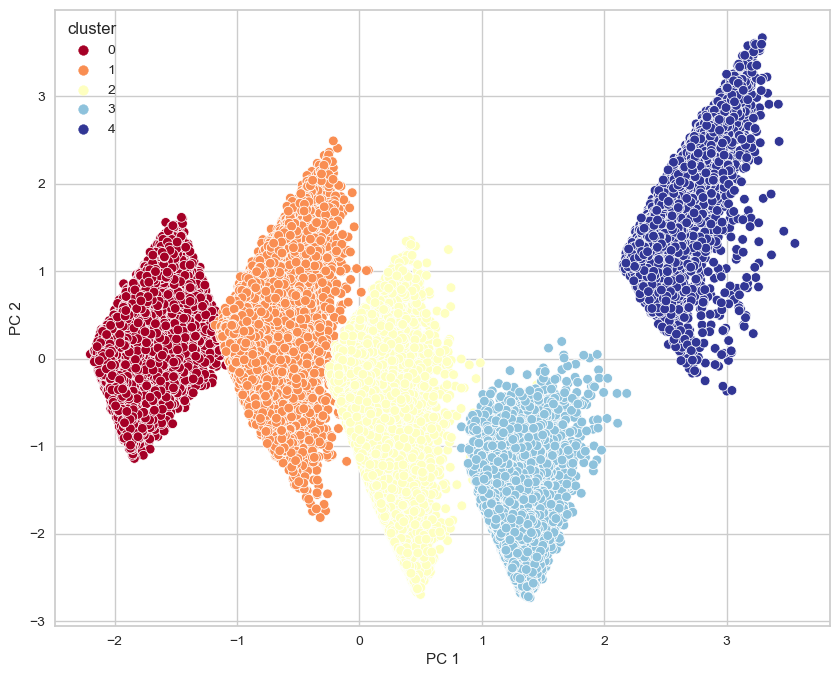

In [79]:
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(data=df_pca, x="PC 1", y="PC 2", hue="cluster", palette='RdYlBu')

## Intepretasi & Reccomendation

In [80]:
df2['cluster'] = kmeans.labels_
df_stat = display(df2.groupby('cluster').agg(['mean','median','min','max']))

Loyalty                     Recency                   Frequency  \
              mean median min  max        mean median  min  max       mean   
cluster                                                                      
0        27.736802   25.0  12   63  102.921480   86.0    1  370   7.854342   
1        82.349792   81.0  52  114  132.256555  107.5    1  618   7.037858   
2        33.088060   28.0  12  111  250.672527  239.0    1  626   4.763339   
3        39.149319   32.0  12  113  460.914632  468.0  192  626   3.970945   
4        48.634630   44.0  12  114   60.233384   33.0    1  503  20.335725   

                        Discount                                
        median min max      mean    median       min       max  
cluster                                                         
0          8.0   2  17  0.746537  0.736109  0.506706  1.101005  
1          6.0   2  19  0.705618  0.700423  0.320000  1.104221  
2          4.0   2  23  0.503535  0.510331  0.315783  0.685793  
3          3.0   2  20  0.794182  0.785599  0.518827  1.105253  
4         19.0  12  33  0.707181  0.706303  0.339656  1.100605

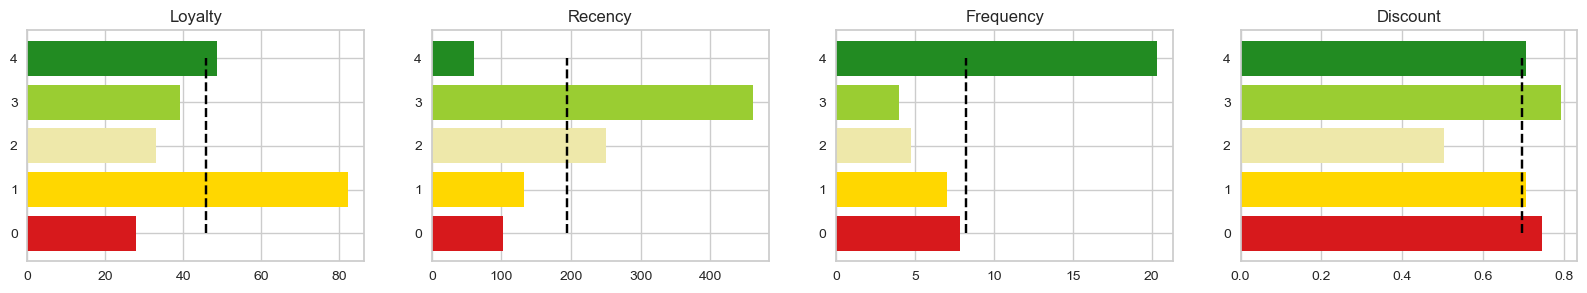

In [81]:
# melihat rata-rata variabel antar cluster
c = ["#d7191c","#FFD700","#EEE8AA","#9ACD32","#228B22"]

plt.figure(figsize=[len(features)*5,3])
i = 1
for col in features:
  ax = plt.subplot(1,len(features),i)
  ax.vlines(df2[col].mean(), ymin=0, ymax=4, color='black', linestyle='--')
  g = df2.groupby('cluster')
  x = g[col].mean().index
  y = g[col].mean().values
  ax.barh(x,y, color = c)
  plt.title(col)
  i = i+1

**Intepretasi :**

1. Cluster 0 - **New Customers**
    *  Cluster New Customers memiliki tingkat rata-rata loyalty yang cukup tinggi dengan recency yg sangat rendah, tetapi frequency penerbangan dan tingkat discount tergolong tinggi, hal ini dapat menunjukan pelanggan cluster ini cenderung menjadi anggota dalam waktu singkat.
2. Cluster 1 - **Loyal Customers**
    *  Cluster Loyal Customers memiliki tingkat Loyalty yang sangat tinggi dimana pelanggan telah menjadi member dalam jangka waktu yang lama meskipun Recency dan aktivitas Frequency penerbangan mereka sedang.
3. Cluster 2 - **Potential Loyal Customers**
    *  Cluster Potential Loyal Customers memiliki rata-rata tingkat Loyalty yang rendah. Meskipun belum menjadi Loyal Customers, cluster ini berpotensi karena pelanggan melakukan transaksi Recency sedikit tinggi dan frequency penerbangan lebih tinggi dibanding cluster Loyal Customers.
4. Cluster 3 - **Inactive Customers**
    *  Cluster Inactive Customers memiliki rata-rata Loyalty yang rendah dan melakukan pesanan penerbangan terakhir sudah sangat lama dan melakukan aktivitas penerbangan sangat rendah. Hal ini dapat menunjukan pelanggan telah lama menjadi anggota tetapi tidak aktif bertransaksi.
5. Cluster 4 - **General Customers**
    *  Cluster General Customers memiliki rata-rata Loyalty yang rendah, Recency yang tinggi, Frequency penerbangan sedang dan memiliki tingkat Discount yang sangat rendah.

---

**Business Recommendation:**

1. Cluster 0 - **New Customers**
    *  Menawarkan voucher atau diskon menarik agar memotivasi untuk bertransaksi lebih lanjut.
    *  Menawarkan program member dengan manfaat yang menarik.
2. Cluster 1 - **Loyal Customers**
    *  Menawarkan program loyalitas pelanggan untuk memperkuat keterikatan dengan pelanggan, dimana dengan bergabung program dapat memperoleh manfaat lebih dibandingkan cluster lain seperti loyalty point yang dapat diredeem dengan reward menarik, diskon khusus, hadiah langsung, atau voucher untuk penerbangan selanjutnya.
3. Cluster 2 - **Potential Loyal Customers**
    *  Menawarkan promo bundling atas pemesanan tiket penerbangan.
    *  Memberikan point atas setiap transaksi yang dapat diredeem dengan reward.
    *  Memberikan diskon atau voucher untuk penerbangan selanjutnya.
4. Cluster 3 - **Inactive Customers**
    *  Memberikan promo khusus atau insentif kepada pelanggan agar bertransaksi kembali, seperti diskon khusus dan program penerbangan.
5. Cluster 4 - **General Customers**
    *  Menawarkan program member dengan manfaat yang menarik untuk bertransaksi lebih lanjut.